<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://wikistat.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/wikistat.jpg" style="max-width: 250px; display: inline"  alt="Wikistat"/></a>

<a href="http://www.math.univ-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo_imt.jpg" style="float:right; max-width: 250px; display: inline" alt="IMT"/> </a>
</center>

# [Scénarios d'Exploration Statistique](https://github.com/wikistat/Exploration)

# Exploration de données d'enquête en <a href="https://cran.r-project.org/"><img src="https://cran.r-project.org/Rlogo.svg" style="max-width: 40px; display: inline" alt="R"/></a>:  explication du seuil de revenu 

### Résumé
Analyse de données extraites d'un recensement aux USA de 1994. Préparation des données, exploration élémentaire et multidimensionnelle ([ACP](http://wikistat.fr/pdf/st-m-explo-acp.pdf), [AFCM](http://wikistat.fr/pdf/st-m-explo-afcm.pdf)), [classification non supervisée](http://wikistat.fr/pdf/st-m-explo-classif.pdf). L'objectif est de préparer l'[étape suivante](https://github.com/wikistat/Apprentissage/tree/master/Adult-Census) consistant à modéliser / prévoir le niveau de revenu.

## Introduction
Des données publiques disponibles sur le site [UCI repository](http://archive.ics.uci.edu/ml/) sont extraites de la base de données issue du recensement réalisé aux Etats Unis en 1994. Ces données son largement utilisées et font référence comme outil de *benchmark* pour comparer les performances de méthodes d’apprentissage ou modélisation statistique. L’objectif est alors de prévoir la variable binaire « revenu annuel » supérieur ou inférieur à 50k$. Le travail décrit dans ce document est un préalable, il propose une exploration des données pour en appréhender les grandes structures. Il ne s’agit pas encore de données massives mais 32.561 individus sont décrits par les 14 variables du tableau ci-dessous :

Num| Libellé |	Ensemble de valeurs
-|--|--|--
1|`Age`|	real
2|	`workClass`|	Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked
3|	`fnlwgt`|	real
4|	`education`|	Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool
5|	`educNum`|	integer
6|	`mariStat`|	Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse
7|	`occup`|	Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces
8|	`relationship`|	Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried
9|	`origEthn`|	White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black
10|	`sex`|	Female, Male
11|	`capitalGain`|	real  
12|	`capitalLoss`|	real
13|	`hoursWeek`|	real
14|	`nativCountry`|	United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands
15|	`income`|		>50K, <=50K

Une première étape permet de vérifier, sélectionner, recoder les données, avant d’aborder des outils plus élaborés. Les questions suivent la chronologie de ce déroulement.

La deuxième étape cherchant un meilleur modèle de prévision du dépassement de seuil de revenu est détaillée dans un [scénario](https://github.com/wikistat/Apprentissage/tree/master/Adult-Census) de la [saison 3: Apprentissage](https://github.com/wikistat/Apprentissage).


**Répondre aux questions en s'aidant des résultats des exécutions**.

## 1 Préparation des données
La lecture et la transformation des données est obtenue directement en exécutant un code source en R. Consulter le code du programme pour comprendre les transformations qui ont été réalisées sur les données brutes. Cette étape a été largement anticipée et simplifiée par la fourniture du programe afférent. Ne pas oublier qu'elle est essentielle et occupe la plus grande partie du temps nécessaire à une analyse. Elle aurait pu être rendue plus efficace (programme plus concis et exécution plus rapide) en utilisant la librairie [`dplyr`](https://cran.r-project.org/web/packages/dplyr/dplyr.pdf) très adaptée à cet usage.

Charger les [données](https://www.math.univ-toulouse.fr/~besse/Wikistat/data/adultCensus.dat) et le [programme](https://www.math.univ-toulouse.fr/~besse/Wikistat/programmes/dataPrepAdultCensus.R) dans le répertoire courant (`path=""`) en même temps que ce tutoriel ou changer de chemin pour y accéder directement. 

In [2]:
# Chemin pour charger au moment de l'exécution:
# path="http://www.math.univ-toulouse.fr/~besse/Wikistat/programmes/"
path=""
source(paste(path,"dataPrepAdultCensus.R",sep=""))
summary(dataBase)

      age                workClass         fnlwgt              education   
 Min.   :18.00   Federal-Govt :  933   Min.   :  13769   HS-grad    :9829  
 1st Qu.:28.00   Not-Working  :   14   1st Qu.: 117627   HS-Graduate:6674  
 Median :37.00   Other-Govt   : 3330   Median : 178487   Bachelors  :5043  
 Mean   :38.68   Private      :21988   Mean   : 189879   Dropout    :3421  
 3rd Qu.:47.00   Self-Employed: 3560   3rd Qu.: 237671   Associates :2315  
 Max.   :90.00                         Max.   :1484705   Masters    :1626  
                                                         (Other)    : 917  
    educNum               mariStat              occup     
 Min.   : 1.00   Married      :14081   Admin       :3698  
 1st Qu.: 9.00   Never-Married: 9394   Blue-Collar :9840  
 Median :10.00   Not-Married  : 5523   Other-occups:1552  
 Mean   :10.16   Widowed      :  827   Professional:4028  
 3rd Qu.:13.00                         Sales       :3498  
 Max.   :16.00                        

## 2 Description
**Q** Quelle est la population étudiée ? Quel est l’échantillon ?

**Q** Commenter, justifier les différentes transformations opérées. Repérer les variables quantitatives, qualitatives. Certaines (`age`, `hoursWeek`) sont présentes sous les deux types. Beaucoup de modalités on déjà été regroupées, notamment celles de `nativCountry` (voir le programme) certaines variables sont rendues qualitatives (`capitalLoss` ou `Gain`).

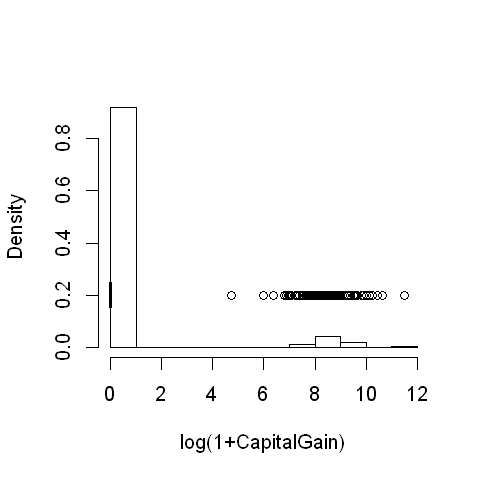

In [3]:
# dimensions des graphiques
options(repr.plot.width=4, repr.plot.height=4)
hist(dataBase[,"LcapitalGain"],probability=T, main="",xlab="log(1+CapitalGain)")
boxplot(dataBase[,"LcapitalGain"], horizontal=TRUE,boxwex=.2,  outline=TRUE,  
        frame=F, col = "lightgrey", add = TRUE,at=0.2)

**Q** Quels sont ces graphiques? Que dire de la transformation  opérée ? La variable CapitalLoss subit le même traitement.

Certains couples de variables posent des problèmes. 

In [4]:
table(dataBase$relationship,dataBase$sex)     

                
                 Female  Male
  Husband             1 12459
  Not-in-family    3563  4150
  Other-relative    379   493
  Own-child        1825  2343
  Unmarried        2459   747
  Wife             1405     1

In [5]:
table(dataBase$education,dataBase$educNum)  

             
                 1    2    3    4    5    6    7    8    9   10   11   12   13
  Associates     0    0    0    0    0    0    0    0    0    0 1307 1008    0
  Bachelors      0    0    0    0    0    0    0    0    0    0    0    0 5043
  Doctorate      0    0    0    0    0    0    0    0    0    0    0    0    0
  Dropout       45  151  287  554  432  714  894  344    0    0    0    0    0
  HS-grad        0    0    0    0    0    0    0    0 9829    0    0    0    0
  HS-Graduate    0    0    0    0    0    0    0    0    0 6674    0    0    0
  Masters        0    0    0    0    0    0    0    0    0    0    0    0    0
  Prof-School    0    0    0    0    0    0    0    0    0    0    0    0    0
             
                14   15   16
  Associates     0    0    0
  Bachelors      0    0    0
  Doctorate      0    0  375
  Dropout        0    0    0
  HS-grad        0    0    0
  HS-Graduate    0    0    0
  Masters     1626    0    0
  Prof-School    0  542    0

In [6]:
table(dataBase$mariStat,dataBase$relationship)

               
                Husband Not-in-family Other-relative Own-child Unmarried  Wife
  Married         12460            14            118        83         0  1406
  Never-Married       0          4435            532      3632       795     0
  Not-Married         0          2832            182       441      2068     0
  Widowed             0           432             40        12       343     0

In [7]:
table(dataBase$origEthn,dataBase$nativCountry)

             
              British-Commonwealth China Euro_1 Euro_2 Latin-America Other
  Amer-Indian                    0     1      1      2             9     0
  Asian                         88   122      2     71             6    43
  Black                          9     0      7      0           163     6
  Other                          6     0      1      0            84     5
  White                        221     6    213    145           779   139
             
              SE-Asia South-America United-States
  Amer-Indian       1             1           267
  Asian           290             0           272
  Black             1             1          2603
  Other             0            20           111
  White            12           188         23929

**Q** Quel est ce problème général ? Qu’est-ce qui va se passer si on en calcule l’analyse des correspondances ? Quel est le problème plus spécifique des variables `relationship` et `sex`?

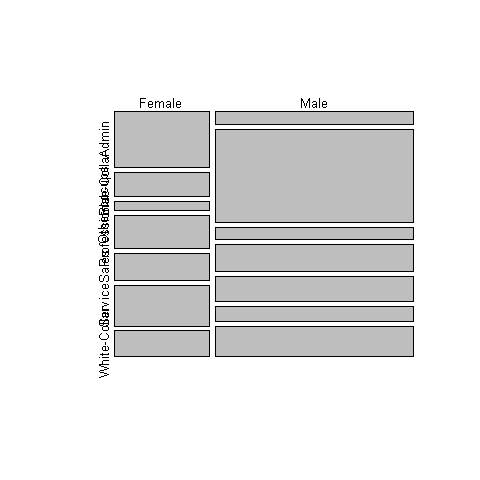

In [8]:
mosaicplot(table(dataBase[,"sex"],dataBase[,"occup"]),main="")

**Q** Quel graphique ci-dessus?  Quelle interprétation ? Quel est le test ci-dessous ? Que doit vérifier la table pour que ce test soit valide ? Quelle est l’hypothèse H0 testée ? Conclusion.

In [9]:
chisq.test(table(dataBase[,"sex"],dataBase[,"occup"]))


	Pearson's Chi-squared test

data:  table(dataBase[, "sex"], dataBase[, "occup"])
X-squared = 5139.3, df = 6, p-value < 2.2e-16


**Q** Quel est le graphique ci-dessous? Comment interpréter? Quel test permettrait de confirmer ? Que dire de l’intérêt de cette variable [fnlwgt](http://web.cs.wpi.edu/~cs4341/C00/Projects/fnlwgt) (Final sampling weight)?

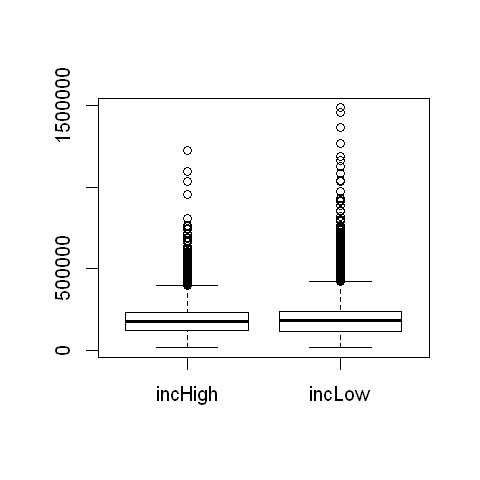

In [10]:
boxplot(fnlwgt~income,data=dataBase,xaxis="Income",yaxis="fnlwgt")

**Q** Que dire dans la figure ci-dessous de la liaison entre les variables `educNum` et `age` et de la localisation des points noirs (>50k€) par rapport aux rouges (<50k€).

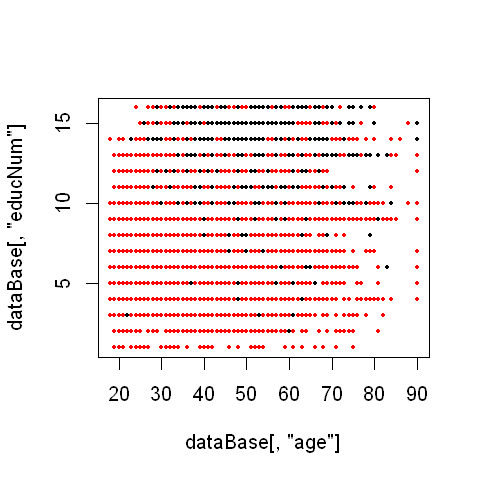

In [11]:
plot(dataBase[,"age"],dataBase[,"educNum"],col=as.integer(dataBase[,"income"]),pch=16,cex=0.5)

## 3 [Analyse en composantes principales](http://wikistat.fr/pdf/st-m-explo-acp.pdf)
**Q** Que représente la figure ci-dessous? 

In [12]:
nrow(as.vector(table(dataBase[,"age"],dataBase[,"educNum"])))

NULL

**Q** Quelle est le graphe ci-dessous? Quel est le cercle?  A quoi sert-il ?

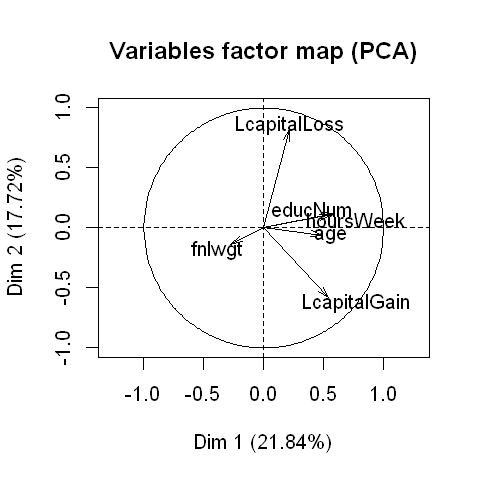

In [13]:
library(FactoMineR)
pca=PCA(dataBase[,c(1,3,5,13,16,17)],scale.unit=T,graph=F)
plot(pca, choix="var")

**Q** La représentation ci-deassous montre un artefact avec 3 paquets d’individus. A quoi est dû cet artéfact ? Est-il utile à la compréhension des données ? 

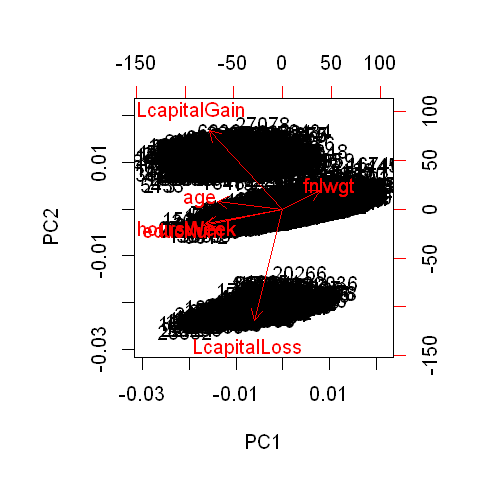

In [14]:
acp=prcomp(dataBase[,c(1,3,5,13,16,17)],scale=T)
biplot(acp)

## 4 [Analyse factorielle des correspondances](http://wikistat.fr/pdf/st-m-explo-afc.pdf) de la table `occup` *vs.* `education`
**Q** Que conclure du test ci-dessous sur l’intérêt d’une analyse des correspondances? Quelle est la table étudiée, ses dimensions?

In [15]:
chisq.test(table(dataBase[,4],dataBase[,7]))


	Pearson's Chi-squared test

data:  table(dataBase[, 4], dataBase[, 7])
X-squared = 14056, df = 42, p-value < 2.2e-16


**Q** Quelles sont les ACPs considérées dans cette analyse des correspondances, avec quelles métriques?

**Q** Quelle est la matrice diagonalisée? 

**Q** Quelle est la significaiton des valeurs (%) présentes dans les légendes?

**Q** Donner en une ligne une signification à l’Axe 1.


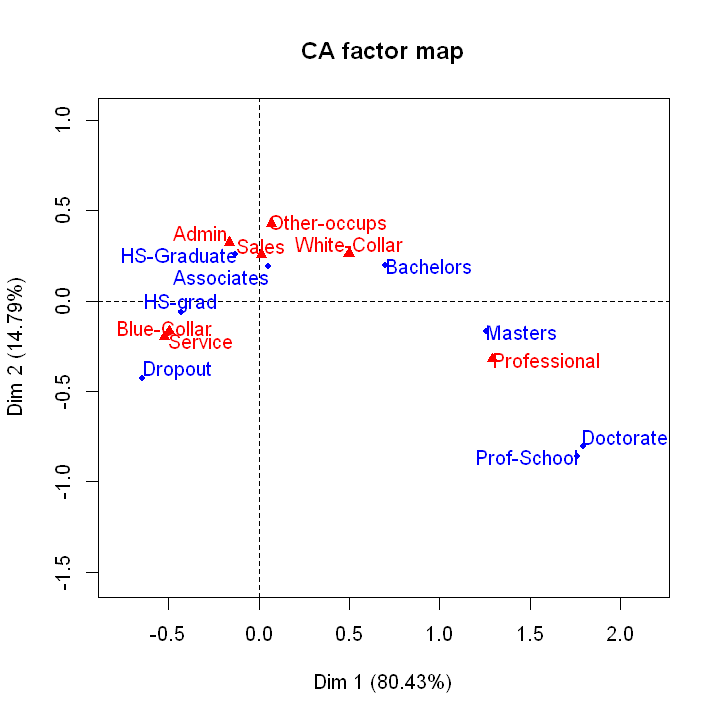

In [16]:
options(repr.plot.width=6, repr.plot.height=6)
coresp=CA(table(dataBase[,c(4,7)]))

## 5 [Analyse factorielle multiple des correspondances](http://wikistat.fr/pdf/st-m-explo-afcm.pdf)
**Q** La section 2 montre le peu d’intérêt de l’ACP. L’AFCM est donc utilisée. Quel prétraitement a été mis en œuvre pour y faire intervenir toutes les variables? Que faire des couples de variables posant problème (première section)?

**Q** Combien d’axes est-il raisonnable de retenir selon la figure ci-dessous? 

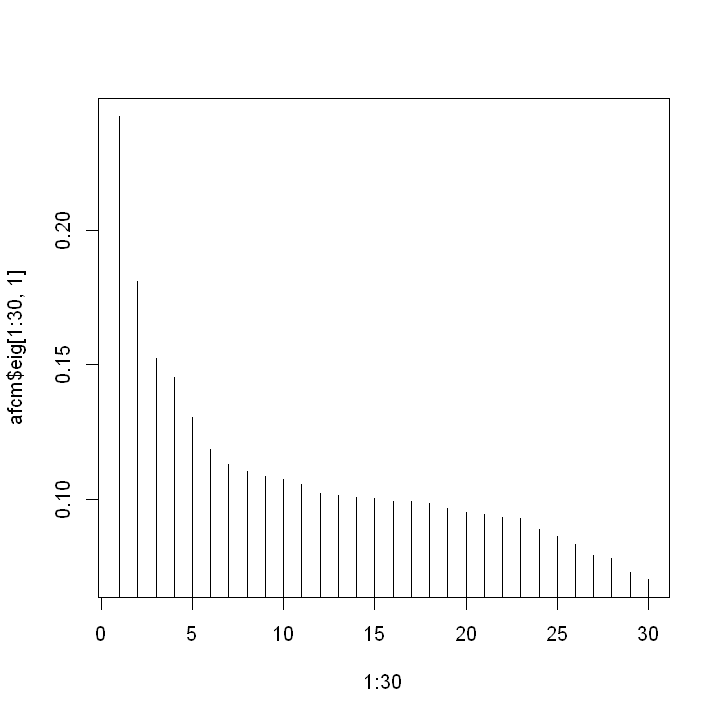

In [17]:
dataq=dataBase[,c(2,4,6,7,9,10,11,12,15,18,19)]
afcm=MCA(dataq,graph=FALSE,quali.sup=c(9))
plot(1:30,afcm$eig[1:30,1],type="h")

**Q** Comment interpréter les axes 1 et 2 ci-dessous? Que signifient les valeurs (%)?

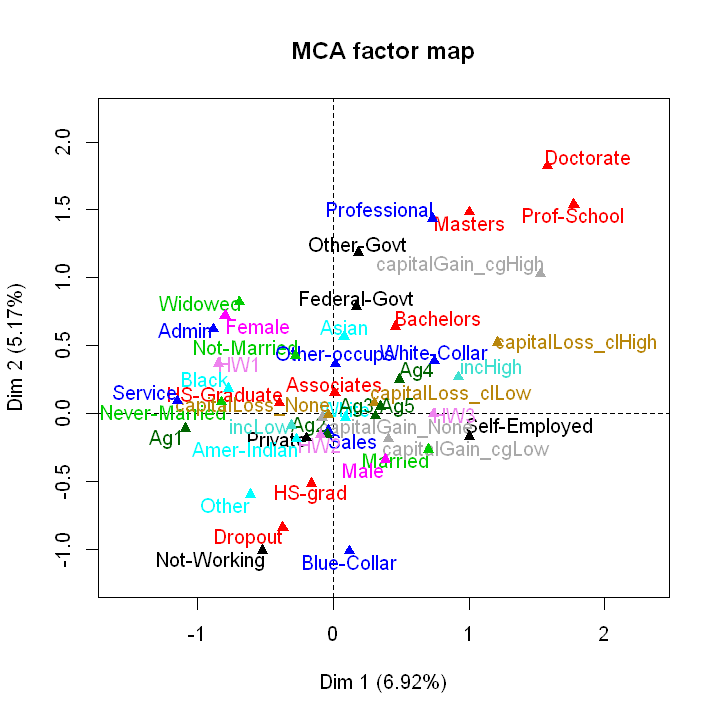

In [18]:
options(repr.plot.width=6, repr.plot.height=6)
plot.MCA(afcm,invisible=c("ind"),habillage="quali")

**Q** A partir de quelle AFC et donc de quelle ACP, quelle SVD le graphe ci-dessous a-t-il été obtenu?  La discrimination des individus de revenus inférieurs ou supérieurs à 50k€ sera-t-elle aisée ?

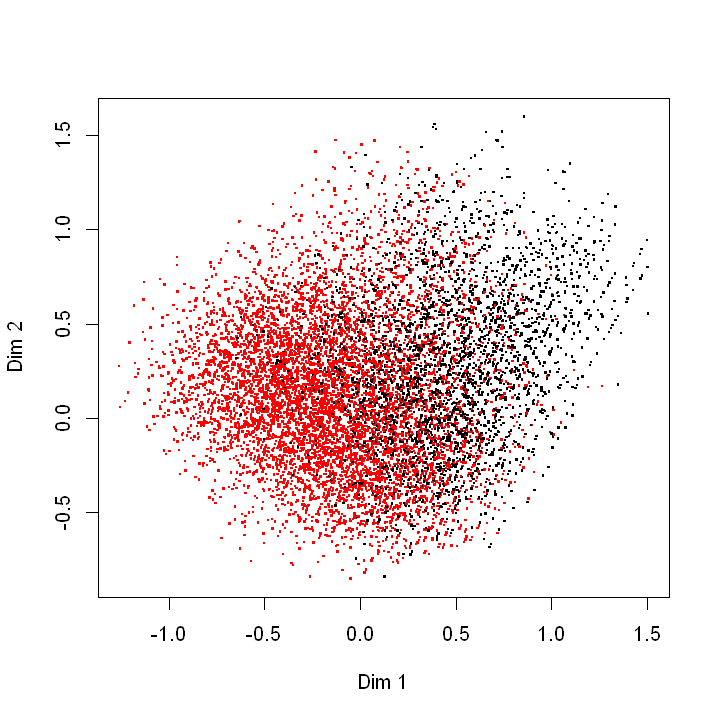

In [19]:
plot(afcm$ind$coord,type="p",pch=".",cex=2,col=as.integer(dataBase$income))

## 6 [Classification non supervisée](http://wikistat.fr/pdf/st-m-explo-classif.pdf)
**Q** Pourquoi la classification ascendante hiérarchique  des données précédentes ne marche-t-elle  pas sur un ordinateur portable  basique? Quelle stratégie faudrait-il mettre en œuvre?

**Q** Les commandes suivantes sont plus simplement exécutées. Quelle astuce est mise en œuvre? Comment choisir le nombre de classes?

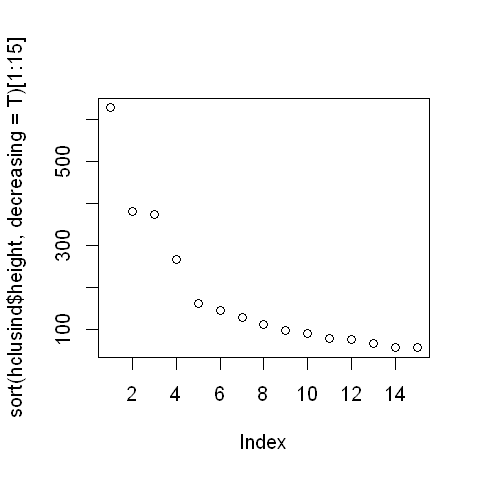

In [20]:
ind=sample(1:nrow(dataq),5000,replace=F)
dist.ind=dist(afcm$ind$coord[ind,], method="euclidean")
hclusind=hclust(dist.ind,method="ward.D")
options(repr.plot.width=4, repr.plot.height=4)
plot(sort(hclusind$height,decreasing=T)[1:15])
Classe=kmeans(afcm$ind$coord, 5)$cluster

Représentation des classes

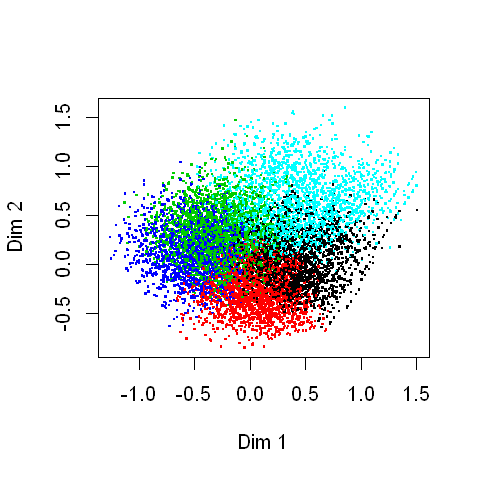

In [21]:
classe=factor(as.factor(Classe),labels=c("C1","C2","C3","C4","C5"))
plot(afcm$ind$coord,type="p",pch=".",cex=2,col=as.integer(classe))

**Q** Expliquer comment les commandes ci-dessous permettent de construire une interprétation des classes. Interpréter ces classes.

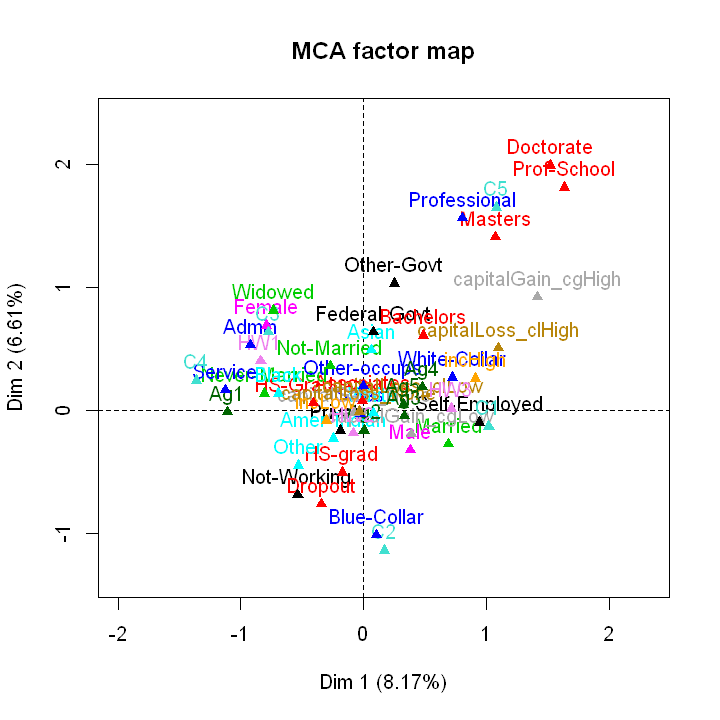

In [25]:
dataqw=data.frame(dataq,"Classe"=classe)
afcm=MCA(dataqw,graph=FALSE,quali.sup=c(9))
options(repr.plot.width=6, repr.plot.height=6)
plot.MCA(afcm,invisible=c("ind"),habillage="quali")